In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import pandas as pd
import datetime


In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date")


In [3]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
03-01-2012,325.25,332.83,324.97,663.59,"73,80,500"
04-01-2012,331.27,333.87,329.08,666.45,"57,49,400"
05-01-2012,329.83,330.75,326.89,657.21,"65,90,300"
06-01-2012,328.34,328.77,323.68,648.24,"54,05,900"
09-01-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 03-01-2012 to 30-12-2016
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


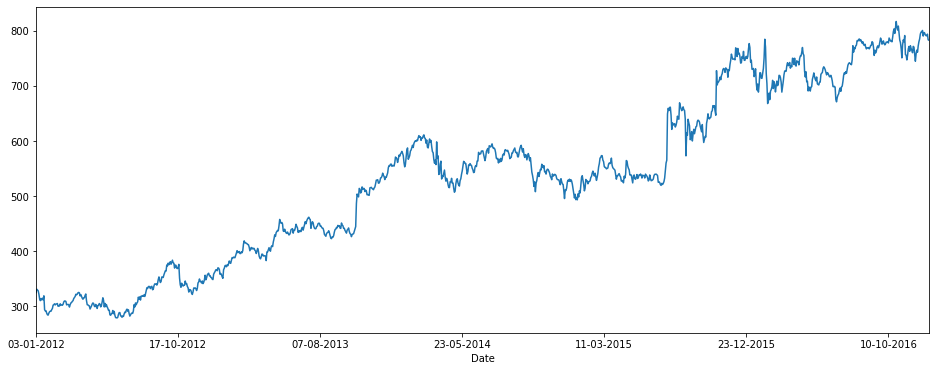

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)



In [8]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)


In [9]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [10]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [13]:
# Initialising the RNN
regressor = Sequential()



In [14]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0412
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0058
Epoch 8/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================

1198/1198 [==============================] - 13s 11ms/step - loss: 0.0017
Epoch 96/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0014


In [16]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)



In [17]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [18]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-03-01,778.81,789.63,775.80,786.14,"16,57,300"
2017-04-01,788.36,791.34,783.16,786.90,"10,73,000"
2017-05-01,786.08,794.48,785.02,794.02,"13,35,200"
2017-06-01,795.26,807.90,792.20,806.15,"16,40,200"
2017-09-01,806.40,809.97,802.83,806.65,"12,72,400"


In [19]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-03-01 to 2017-01-31
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [20]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [21]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [22]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-03-01 to 2017-01-31
Data columns (total 1 columns):
Open    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [23]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [24]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes


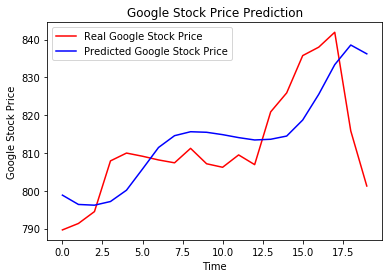

In [25]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
